In [ ]:
import mne
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0,'.')
import ccs_eeg_utils

In [55]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "data/bids"
subject_id = '030' # recommend subject 30 for now


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)

Reading /Users/jan/Meine Ablage (j.hagnberger@gmail.com)/4. Semester DSAI/EEG/data/bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt


Reading events from data/bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values.Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event

/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_68318/1705179904.py:14: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)
/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_68318/1705179904.py:14: RuntimeWarning: "ARS" is not a BIDS-acceptable coordinate frame for EEG. The supported coordinate frames are: ['ICBM452AirSpace', 'ICBM452Warp5Space', 'IXI549Space', 'fsaverage', 'fsaverageSym', 'fsLR', 'MNIColin27', 'MNI152Lin', 'MNI152NLin2009aSym', 'MNI152NLin2009bSym', 'MNI152NLin2009cSym', 'MNI152NLin2009aAsym', 'MNI152NLin2009bAsym', 'MNI152NLin2009cAsym', 'MNI152NLin6Sym', 'MNI152NLin6ASym', 'MNI305', 'NIHPD', 'OASIS30AntsOASISAnts', 'OASIS30Atropos', 'Talairach', 'UNCInfant', 'fsaverage3', 'fsaverage4', 'fsaverage5', 'fsaverage6', 'fsaveragesym', 'UNCInfant0V21', 'UNCInfant1V21', 'UNCInfant2V21', 'UN

In [56]:
raw.get_data().shape

(33, 393216)

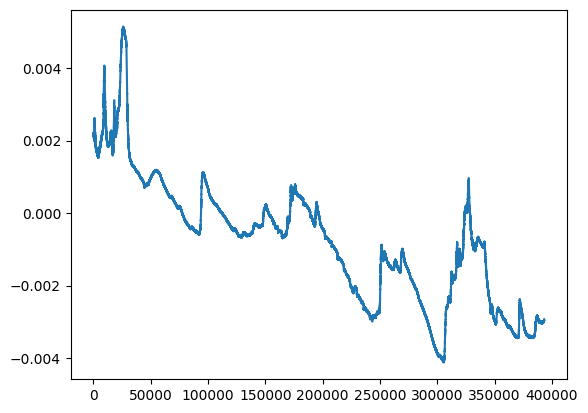

In [57]:
plt.plot(raw[10,:][0].T)

> Question: What is the range of the data (in sense of min-y to max-y in µ-volt)?

The range is -4 to 5 mV (= -4000 to 5000 microV)

In [58]:
# for channel 10
raw[10, :][0].min(), raw[10, :][0].max()

(np.float64(-0.0041224453125), np.float64(0.00515006884765625))

In [59]:
# for all channels
raw[:, :][0].min(), raw[:, :][0].max()

(np.float64(-0.0155894248046875), np.float64(0.037071070312499996))

In [ ]:
# for the Cz channel we use later
cz_ch = raw.copy().pick(["Cz"])
cz_ch.get_data().min(), cz_ch.get_data().max()

(np.float64(0.0129299296875), np.float64(0.024467408203125))

> Task: Have a look at raw.info and note down what the sampling frequency is (how many EEG-samples per second)

1024 samples per second

In [7]:
# 1024 sample per second (1024 Hz)
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 30 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
 subject_info: <subject_info | his_id: sub-030, sex: 2>
>

## Epoching

In [63]:
raw.pick(["Cz"])

<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 1 x 393216 (384.0 s), ~6 KiB, data not loaded>

In [9]:
evts, evts_dict = mne.events_from_annotations(raw)
# get all keys which contain "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
# subset the large event-dictionairy
evts_dict_stim = dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)
evts_dict_stim

Used Annotations descriptions: [np.str_('response:201'), np.str_('response:202'), np.str_('stimulus:11'), np.str_('stimulus:12'), np.str_('stimulus:13'), np.str_('stimulus:14'), np.str_('stimulus:15'), np.str_('stimulus:21'), np.str_('stimulus:22'), np.str_('stimulus:23'), np.str_('stimulus:24'), np.str_('stimulus:25'), np.str_('stimulus:31'), np.str_('stimulus:32'), np.str_('stimulus:33'), np.str_('stimulus:34'), np.str_('stimulus:35'), np.str_('stimulus:41'), np.str_('stimulus:42'), np.str_('stimulus:43'), np.str_('stimulus:44'), np.str_('stimulus:45'), np.str_('stimulus:51'), np.str_('stimulus:52'), np.str_('stimulus:53'), np.str_('stimulus:54'), np.str_('stimulus:55')]


{np.str_('stimulus:11'): 3,
 np.str_('stimulus:12'): 4,
 np.str_('stimulus:13'): 5,
 np.str_('stimulus:14'): 6,
 np.str_('stimulus:15'): 7,
 np.str_('stimulus:21'): 8,
 np.str_('stimulus:22'): 9,
 np.str_('stimulus:23'): 10,
 np.str_('stimulus:24'): 11,
 np.str_('stimulus:25'): 12,
 np.str_('stimulus:31'): 13,
 np.str_('stimulus:32'): 14,
 np.str_('stimulus:33'): 15,
 np.str_('stimulus:34'): 16,
 np.str_('stimulus:35'): 17,
 np.str_('stimulus:41'): 18,
 np.str_('stimulus:42'): 19,
 np.str_('stimulus:43'): 20,
 np.str_('stimulus:44'): 21,
 np.str_('stimulus:45'): 22,
 np.str_('stimulus:51'): 23,
 np.str_('stimulus:52'): 24,
 np.str_('stimulus:53'): 25,
 np.str_('stimulus:54'): 26,
 np.str_('stimulus:55'): 27}

In [10]:
evts_dict

{np.str_('response:201'): 1,
 np.str_('response:202'): 2,
 np.str_('stimulus:11'): 3,
 np.str_('stimulus:12'): 4,
 np.str_('stimulus:13'): 5,
 np.str_('stimulus:14'): 6,
 np.str_('stimulus:15'): 7,
 np.str_('stimulus:21'): 8,
 np.str_('stimulus:22'): 9,
 np.str_('stimulus:23'): 10,
 np.str_('stimulus:24'): 11,
 np.str_('stimulus:25'): 12,
 np.str_('stimulus:31'): 13,
 np.str_('stimulus:32'): 14,
 np.str_('stimulus:33'): 15,
 np.str_('stimulus:34'): 16,
 np.str_('stimulus:35'): 17,
 np.str_('stimulus:41'): 18,
 np.str_('stimulus:42'): 19,
 np.str_('stimulus:43'): 20,
 np.str_('stimulus:44'): 21,
 np.str_('stimulus:45'): 22,
 np.str_('stimulus:51'): 23,
 np.str_('stimulus:52'): 24,
 np.str_('stimulus:53'): 25,
 np.str_('stimulus:54'): 26,
 np.str_('stimulus:55'): 27}

In [11]:
epochs = mne.Epochs(raw, evts, evts_dict_stim, tmin=-0.1, tmax=1)

Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


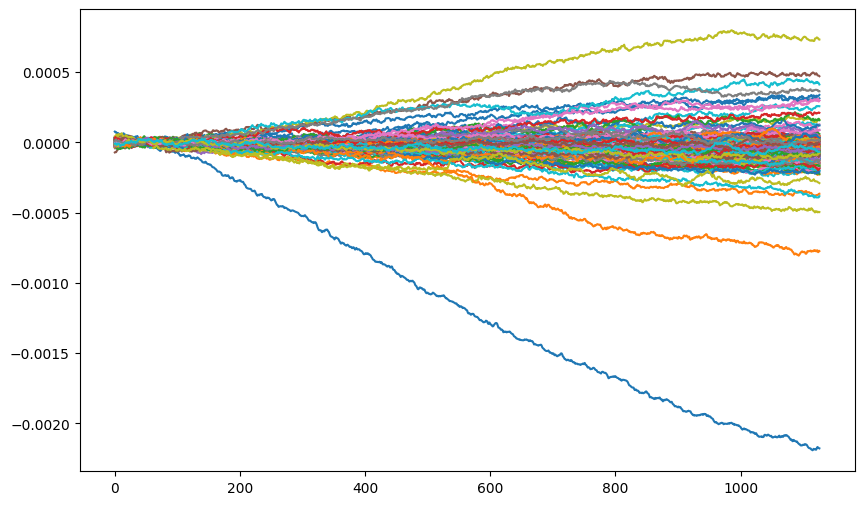

In [ ]:
fig= plt.figure(figsize=(10,6))
for ep in epochs:
    plt.plot(ep[0])
plt.show()

In [21]:
# # get data manually
# window_len = epochs.times.shape[0] # this is basically freq * (tmax - tmin)
# window_len_left = (epochs.times <= 0).shape[0]
# start_idx = (epochs.events[:, 0] - window_len_left)[:, None] + np.arange(window_len)[None, :]

# # seems they remove the mean
# zero_mean = raw.get_data() - raw.get_data().mean()
# data = zero_mean[:, start_idx].transpose(1, 0, 2)  # epochs, channels, len

# # plot
# fig= plt.figure(figsize=(10,6))
# for i in range(data.shape[0]):
#     plt.plot(data[i, 0, :])
# plt.show()

Loading data for 200 events and 1127 original time points ...


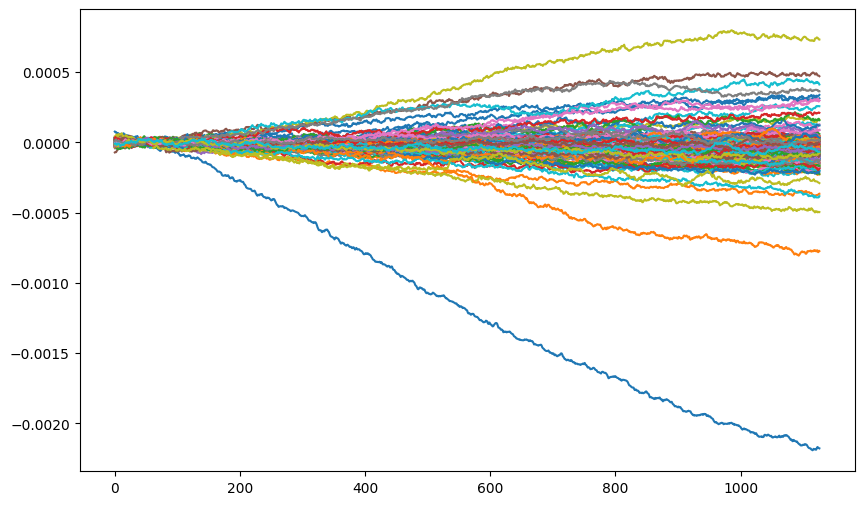

In [22]:
data = epochs.get_data()
fig= plt.figure(figsize=(10,6))
for i in range(data.shape[0]):
    plt.plot(data[i, 0, :])
plt.show()

> Question What is the scale-range of the epoched data now?

The range of the epoched data is -2 to 0.7 mV (= -2000 to 700 microV)

In [23]:
min_val = np.inf
max_val = -np.inf
for ep in epochs:
    min_val = min(min_val, ep[0].min())
    max_val = max(max_val, ep[0].max())

min_val, max_val

(np.float64(-0.00219213899423543), np.float64(0.0007987635865442915))

In [29]:
target = ["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]
distractor = ["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]

target_idx = [evts_dict_stim[ev] for ev in target]
distractor_idx = [evts_dict_stim[ev] for ev in distractor]

Need more than one channel to make topography for eeg. Disabling interactivity.


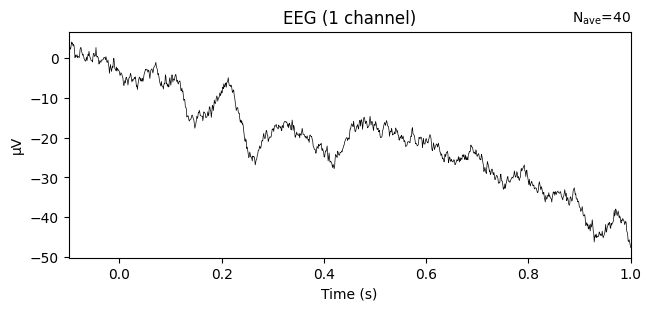

Need more than one channel to make topography for eeg. Disabling interactivity.


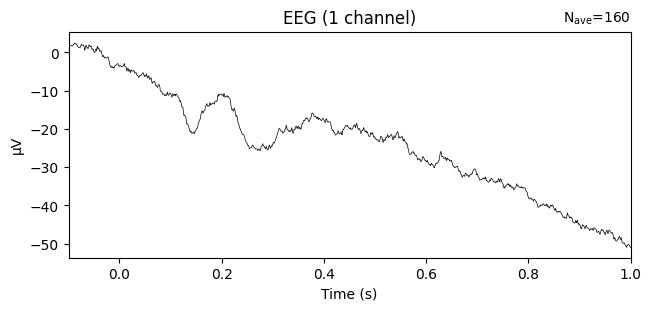

In [47]:
events = epochs.events[:, 2]
index = np.where(np.isin(events, target_idx))[0]
evoked_target = epochs[index].average()

index = np.where(np.isin(events, distractor_idx))[0]
evoked_distractor = epochs[index].average()

fig = evoked_target.plot()
fig = evoked_distractor.plot()

Comment on plots: Target seems to be more spiky than distractor and amplitude seems higher for target.

> Question What is the unit/scale of the data now? Set it into context to the other two scales you reported before

The range of the raw data for channel Cz is 12 mV to 24 mV (= 12000 to 24000 microV). After the epoching, the range is -2 to 0.7 mV (= -2000 to 700 microV). The range is different due to a normalization that is applied during the epoching. The averaged data ranges from -50 to 5 microV because averaging reduces noise/peaks etc.

In [51]:
evoked_distractor.get_data().min(), evoked_distractor.get_data().max(), evoked_target.get_data().min(), evoked_target.get_data().max()

(np.float64(-5.0987127922576596e-05),
 np.float64(2.7254514231266827e-06),
 np.float64(-4.765150229444816e-05),
 np.float64(4.093785791489495e-06))